# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [107]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import api_key1

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [108]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 662


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [145]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&appid={api_key1}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | stornoway
Processing Record 4 of Set 1 | quatre cocos
Processing Record 5 of Set 1 | geraldton
Processing Record 6 of Set 1 | acapulco
Processing Record 7 of Set 1 | olinda
Processing Record 8 of Set 1 | tayshet
Processing Record 9 of Set 1 | lavrentiya
Processing Record 10 of Set 1 | morro bay
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | karratha
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | rawson
Processing Record 17 of Set 1 | macaboboni
City not found. Skipping...
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | samusu
City not found. Skipping...
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of S

Processing Record 40 of Set 4 | wilmington
Processing Record 41 of Set 4 | oranjemund
Processing Record 42 of Set 4 | mullaitivu
City not found. Skipping...
Processing Record 43 of Set 4 | linqing
Processing Record 44 of Set 4 | tasiilaq
Processing Record 45 of Set 4 | asau
Processing Record 46 of Set 4 | gouyave
Processing Record 47 of Set 4 | kamyaran
Processing Record 48 of Set 4 | sao filipe
Processing Record 49 of Set 4 | srednekolymsk
Processing Record 0 of Set 5 | san cristobal
Processing Record 1 of Set 5 | alyangula
Processing Record 2 of Set 5 | zlitan
Processing Record 3 of Set 5 | mehamn
Processing Record 4 of Set 5 | batagay
Processing Record 5 of Set 5 | ambon
Processing Record 6 of Set 5 | adrar
Processing Record 7 of Set 5 | kumluca
Processing Record 8 of Set 5 | bayevo
Processing Record 9 of Set 5 | pompeu
Processing Record 10 of Set 5 | kloulklubed
Processing Record 11 of Set 5 | new norfolk
Processing Record 12 of Set 5 | ahipara
Processing Record 13 of Set 5 | makak

Processing Record 27 of Set 8 | manokwari
Processing Record 28 of Set 8 | zwettl
Processing Record 29 of Set 8 | borovskoy
Processing Record 30 of Set 8 | whitehorse
Processing Record 31 of Set 8 | port blair
Processing Record 32 of Set 8 | port shepstone
Processing Record 33 of Set 8 | labuan
Processing Record 34 of Set 8 | yinchuan
Processing Record 35 of Set 8 | kamenka
Processing Record 36 of Set 8 | mount isa
Processing Record 37 of Set 8 | jojoima
Processing Record 38 of Set 8 | rungata
City not found. Skipping...
Processing Record 39 of Set 8 | eureka
Processing Record 40 of Set 8 | bodesti
Processing Record 41 of Set 8 | puerto carreno
Processing Record 42 of Set 8 | hofn
Processing Record 43 of Set 8 | vila velha
Processing Record 44 of Set 8 | dunedin
Processing Record 45 of Set 8 | borlange
City not found. Skipping...
Processing Record 46 of Set 8 | gopalpur
Processing Record 47 of Set 8 | saint-pierre
Processing Record 48 of Set 8 | husavik
Processing Record 49 of Set 8 | b

Processing Record 16 of Set 12 | kudahuvadhoo
Processing Record 17 of Set 12 | zhangye
Processing Record 18 of Set 12 | panguna
Processing Record 19 of Set 12 | kolpashevo
Processing Record 20 of Set 12 | pasni
Processing Record 21 of Set 12 | kontagora
Processing Record 22 of Set 12 | alekseyevsk
Processing Record 23 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 24 of Set 12 | banjarmasin
Processing Record 25 of Set 12 | umm jarr
City not found. Skipping...
Processing Record 26 of Set 12 | hirara
Processing Record 27 of Set 12 | tadine
Processing Record 28 of Set 12 | mumford
Processing Record 29 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 30 of Set 12 | taksimo
Processing Record 31 of Set 12 | port-cartier
Processing Record 32 of Set 12 | half moon bay
Processing Record 33 of Set 12 | colares
Processing Record 34 of Set 12 | lensk
Processing Record 35 of Set 12 | jilove u prahy
Processing Record 36 of Set 12 | dong hoi
Processing Record 37 o

In [146]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          606
Lat           606
Lng           606
Max Temp      606
Humidity      606
Cloudiness    606
Wind Speed    606
Country       606
Date          606
dtype: int64

In [147]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carnarvon,-24.8667,113.6333,28.19,61,94,6.98,AU,1675908248
1,hilo,19.7297,-155.0900,22.84,87,16,1.34,US,1675908122
2,stornoway,58.2093,-6.3865,3.29,86,40,10.80,GB,1675908249
3,quatre cocos,-20.2078,57.7625,25.61,83,38,5.30,MU,1675908249
4,geraldton,-28.7667,114.6000,28.23,47,0,4.63,AU,1675908249


In [148]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [149]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carnarvon,-24.8667,113.6333,28.19,61,94,6.98,AU,1675908248
1,hilo,19.7297,-155.0900,22.84,87,16,1.34,US,1675908122
2,stornoway,58.2093,-6.3865,3.29,86,40,10.80,GB,1675908249
3,quatre cocos,-20.2078,57.7625,25.61,83,38,5.30,MU,1675908249
4,geraldton,-28.7667,114.6000,28.23,47,0,4.63,AU,1675908249


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

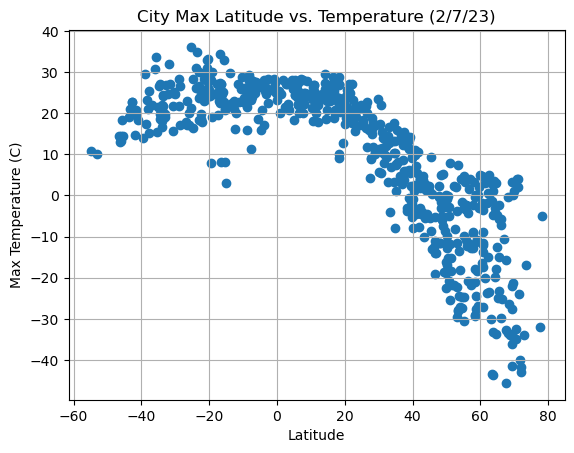

In [150]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2/7/23)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

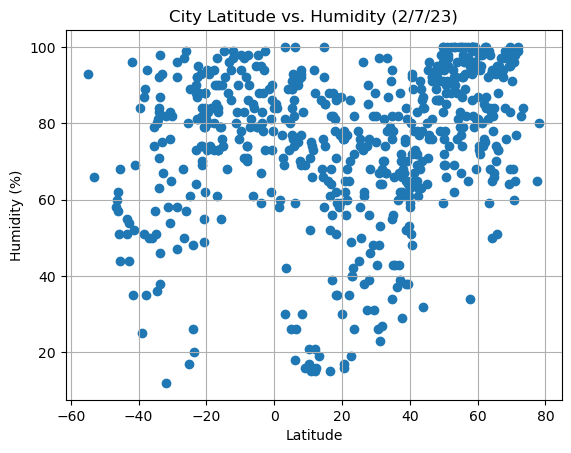

In [151]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2/7/23)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

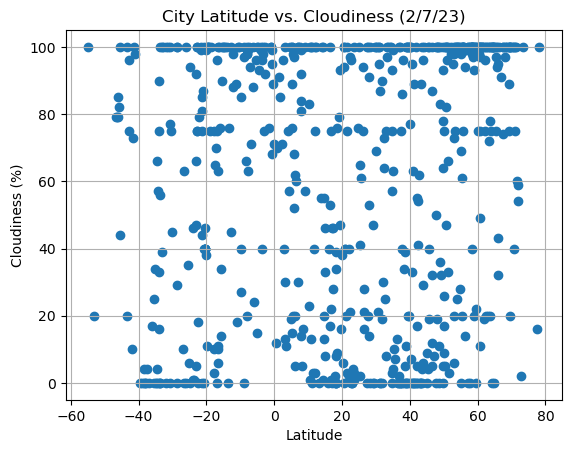

In [152]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2/7/23)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

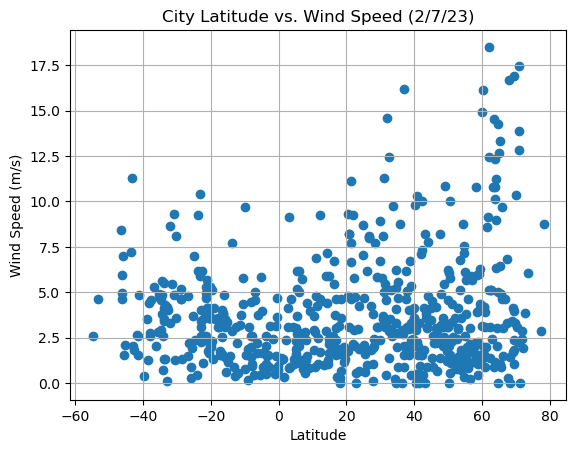

In [153]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2/7/23)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [154]:
# Define a function to create Linear Regression plots
def Create_Linear_Regression_Plot(x_values, y_values, ylabeltext, charttitle, labellocation):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    Regress_Values = x_values * slope + intercept
    Line_Equation_Label = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    
    # Plot the Regression
    plt.scatter(x_values,y_values)
    plt.plot(x_values,Regress_Values,"red")
    plt.annotate(Line_Equation_Label,labellocation,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabeltext)
    plt.title(charttitle)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [155]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hilo,19.7297,-155.0900,22.84,87,16,1.34,US,1675908122
2,stornoway,58.2093,-6.3865,3.29,86,40,10.80,GB,1675908249
5,acapulco,16.8634,-99.8901,25.28,68,22,3.00,MX,1675907995
7,tayshet,55.9342,98.0044,-12.27,96,100,0.81,RU,1675908251
8,lavrentiya,65.5833,-171.0000,-23.29,95,100,0.87,RU,1675908251


In [156]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carnarvon,-24.8667,113.6333,28.19,61,94,6.98,AU,1675908248
3,quatre cocos,-20.2078,57.7625,25.61,83,38,5.30,MU,1675908249
4,geraldton,-28.7667,114.6000,28.23,47,0,4.63,AU,1675908249
6,olinda,-8.0089,-34.8553,26.85,74,20,2.57,BR,1675908250
11,bredasdorp,-34.5322,20.0403,18.63,80,0,4.85,ZA,1675908212


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7310024627036691


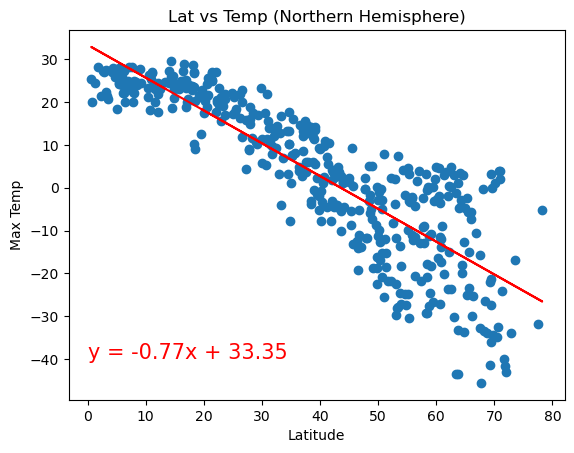

In [158]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
Create_Linear_Regression_Plot(x_values, y_values, 'Max Temp',"Lat vs Temp (Northern Hemisphere)",(0,-40))

The r-value is: 0.10918406665726525


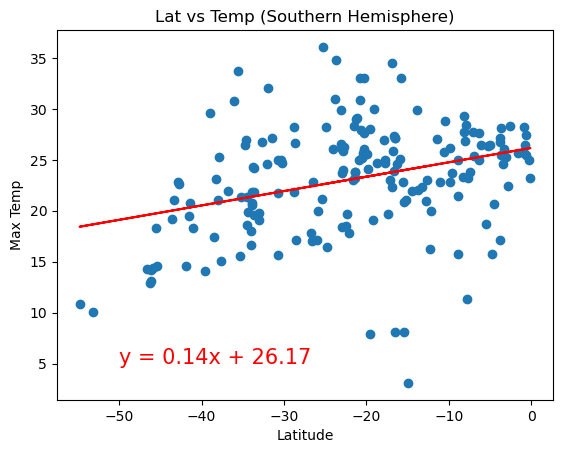

In [160]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
Create_Linear_Regression_Plot(x_values, y_values, 'Max Temp',"Lat vs Temp (Southern Hemisphere)",(-50,5))

**Discussion about the linear relationship:** There looks to be a strong negative correlation in the northern hemisphere, meaning as you get farther to the equator, you are most likely going to have lower temp. However in the southern hemisphere, the correlation is not as strong as you move away from the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1751277455490256


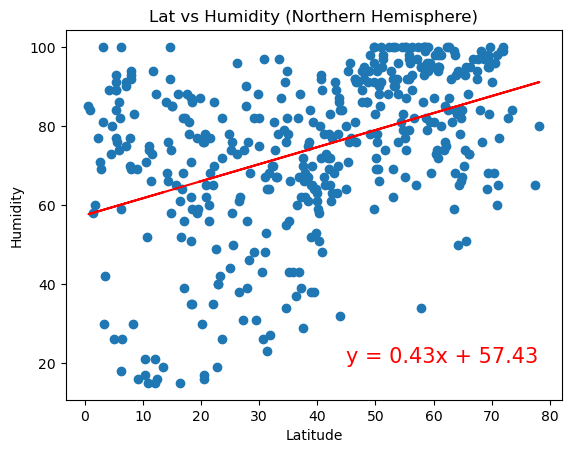

In [161]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
Create_Linear_Regression_Plot(x_values, y_values, 'Humidity',"Lat vs Humidity (Northern Hemisphere)",(45,20))

The r-value is: 0.1641512754150931


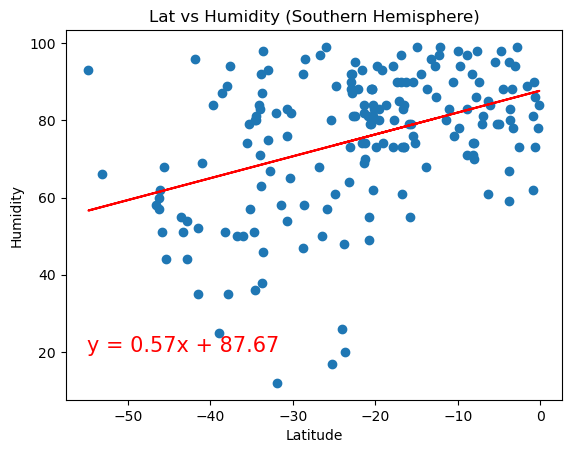

In [162]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
Create_Linear_Regression_Plot(x_values, y_values, 'Humidity', "Lat vs Humidity (Southern Hemisphere)",(-55,20))

**Discussion about the linear relationship:** Both the northern and southern hemisphere do not have a strong correlation between latitude and humidity. In the southern hemisphere you get generally more humid closer to the equator. In the northern hemisphere, you actually get more humid further away from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06620975732977658


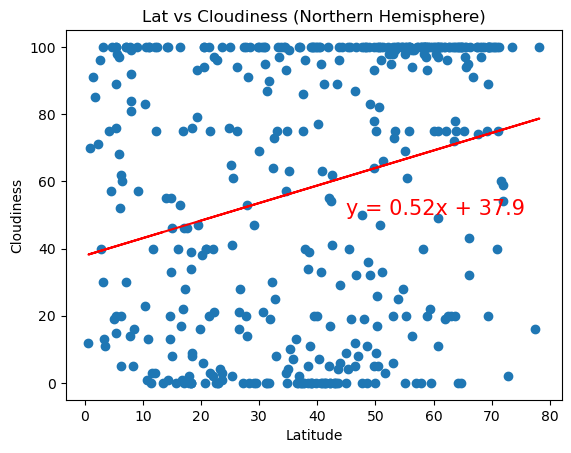

In [163]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
Create_Linear_Regression_Plot(x_values, y_values, 'Cloudiness',"Lat vs Cloudiness (Northern Hemisphere)", (45,50))

The r-value is: 0.09038975810181092


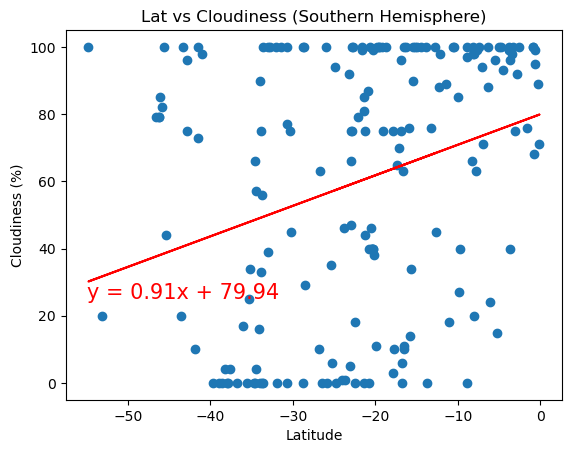

In [164]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
Create_Linear_Regression_Plot(x_values, y_values, 'Cloudiness (%)', "Lat vs Cloudiness (Southern Hemisphere)",(-55,25))

**Discussion about the linear relationship:** There is no correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03517133785793203


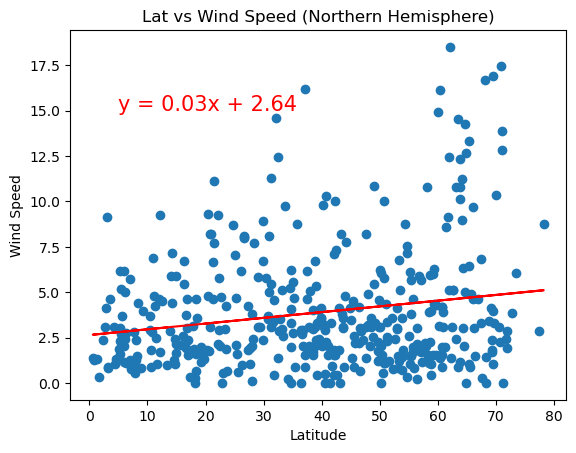

In [165]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
Create_Linear_Regression_Plot(x_values, y_values, 'Wind Speed', "Lat vs Wind Speed (Northern Hemisphere)",(5,15))

The r-value is: 0.09427295421938404


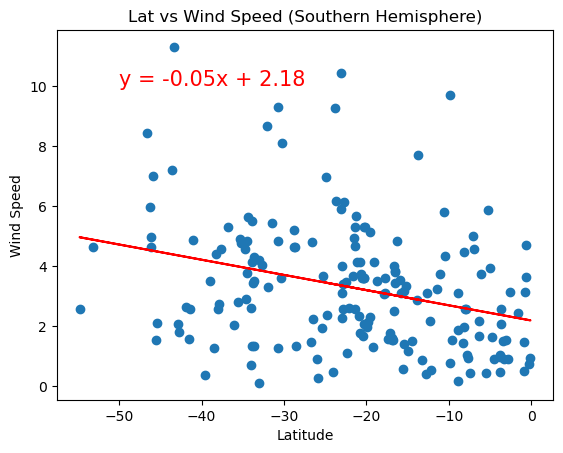

In [166]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
Create_Linear_Regression_Plot(x_values, y_values, 'Wind Speed',"Lat vs Wind Speed (Southern Hemisphere)",(-50,10))

**Discussion about the linear relationship:** There is little correlation between latitude and wind speed, however in the southern hemisphere there is a case that could be made that as you get closer to the equator you can expect lower wind speeds.